In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
calls = pd.read_csv("./test_data/911.csv")

In [3]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


top 5 zipcodes for 911 calls

In [5]:
calls.groupby("zip")["title"].count().sort_values(ascending=False).head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: title, dtype: int64

In [7]:
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

 top 5 townships (twp)

In [8]:
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [ ]:
unique titles

In [10]:
calls["title"].nunique()

110

In [13]:
calls["department"]= calls["title"].apply(lambda x: x.split(":")[0])
calls["department"].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: department, dtype: object

In [15]:
calls["department"].value_counts().head(5)

EMS        48877
Traffic    35695
Fire       14920
Name: department, dtype: int64

<AxesSubplot:xlabel='department', ylabel='count'>

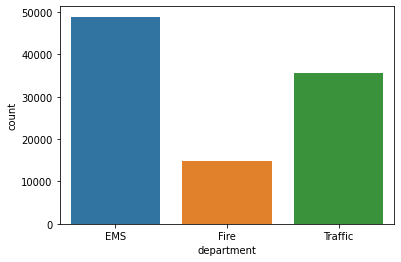

In [17]:
sns.countplot(x="department", data= calls)

In [35]:
type(calls["timeStamp"].iloc[0])

str

In [36]:
calls["time"]=pd.to_datetime(calls["timeStamp"])


In [39]:
calls["time"].iloc[0].day_of_week

3

In [40]:
calls["day_of_week"]=calls["time"].apply(lambda x:x.day_of_week)

In [45]:
calls["hour"]=calls["time"].apply(lambda x:x.hour)

In [46]:
calls["month"]=calls["time"].apply(lambda x:x.month)

In [47]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,time,day_of_week,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,3,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,3,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,3,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,3,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,3,17,12


In [48]:
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [50]:
calls["day_of_week"]=calls["day_of_week"].apply(lambda x:dmap.get(x))

In [51]:
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,time,day_of_week,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,Thu,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,Thu,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,Thu,17,12


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

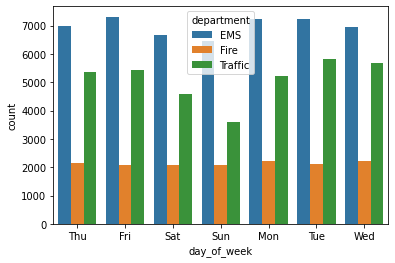

In [53]:
sns.countplot(x="day_of_week", data=calls, hue='department')

In [56]:
byMonth= calls.groupby("month").count()

<AxesSubplot:xlabel='month'>

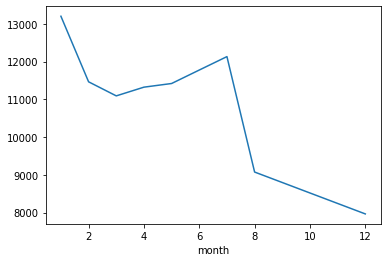

In [57]:
byMonth['twp'].plot()

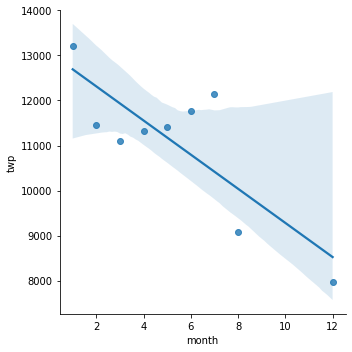

In [58]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,time,day_of_week,hour
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101


In [60]:
calls['date']=calls['time'].apply(lambda t: t.date())

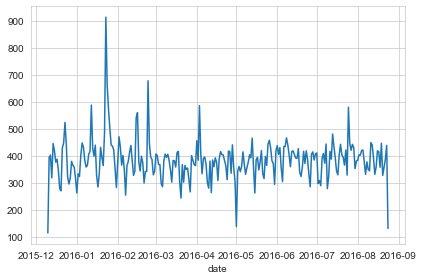

In [66]:
sns.set_style('whitegrid')
calls.groupby('date').count()['twp'].plot()
plt.tight_layout()


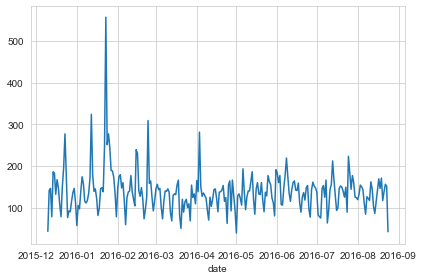

In [68]:
calls[calls['department']=='Traffic'].groupby('date').count()['twp'].plot()
plt.tight_layout()


In [73]:
timespread = calls.groupby(by=['day_of_week','hour']).count()['department'].unstack()
timespread

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

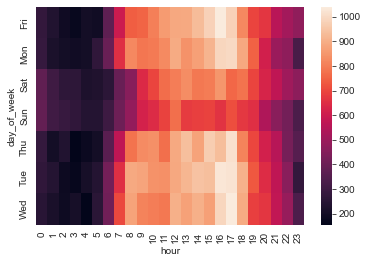

In [74]:
sns.heatmap(timespread)

<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

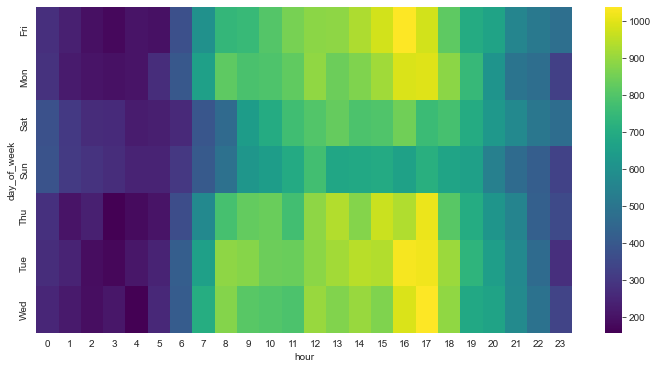

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(timespread, cmap="viridis")

In [77]:
timespread2= calls.groupby(by=['day_of_week','month']).count()['department'].unstack()


<AxesSubplot:xlabel='month', ylabel='day_of_week'>

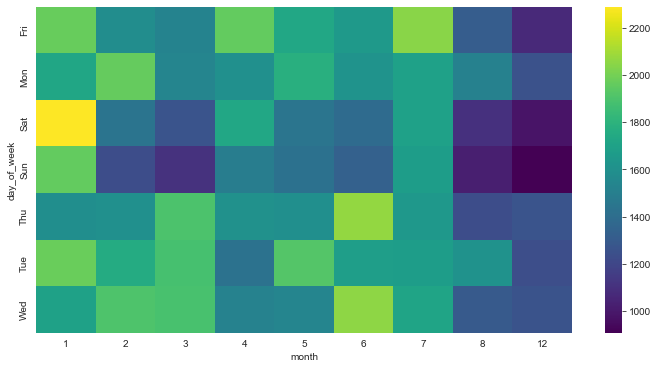

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(timespread2, cmap="viridis")